In [1]:
import pandas as pd
from pathlib import Path

from posydon.popsyn.binarypopulation import BinaryPopulation
from posydon.binary_evol.binarystar import BinaryStar
from posydon.binary_evol.singlestar import SingleStar
from posydon.popsyn.synthetic_population import Population

import astropy.units as u


In [2]:
dataPath = Path('/home/bku2126/b1095/bku2126/UCXBInvestigation/Data').resolve()

(dataPath /'1e+00_Zsun_population_max.h5').resolve()

PosixPath('/gpfs/projects/b1095/bku2126/UCXBInvestigation/Data/1e+00_Zsun_population_max.h5')

In [3]:
loadedpop = Population('/home/bku2126/b1095/bku2126/UCXBInvestigation/Data/1e+00_Zsun_population_max.h5')


Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max


In [4]:
# loadedpop.ini_params

In [5]:
cols = ['time', 'step_names', 'state', 'event', 'S1_state', 'S2_state', 'S1_mass', 'S2_mass', 'orbital_period']
finCols = [
    'orbital_period_f',
    'eccentricity_f',
    'state_f',

    'S2_state_f',
    'S2_mass_f',
    'S2_log_R_f',

    'S1_state_f',
    'S1_mass_f',
    'S1_log_R_f'
 ]

initCols = [
    'orbital_period_i',
    'eccentricity_i',
    'state_i',

    'S2_state_i',
    'S2_mass_i',
    'S2_log_R_i',

    'S1_state_i',
    'S1_mass_i',
    'S1_log_R_i'
 ]

In [6]:
loadedpop.oneline[5][finCols]

,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S1_state_f,S1_mass_f,S1_log_R_f
binary_index,,,,,,,,,
5,0.215179,0.45703,detached,NS,1.357263,-4.745687,BH,10.248538,-4.361463


In [7]:
XrB_Logic = "((S2_state_f == 'BH') | (S2_state_f == 'NS')) & ((S1_state_f != 'BH') & (S1_state_f != 'NS')) | ((S1_state_f == 'BH') | (S1_state_f == 'NS')) & ((S2_state_f != 'BH') & (S2_state_f != 'NS')) &((state_f == 'initial_RLOF') | (state_f == 'RLO2') | (state_f == 'detached')) "



In [8]:
XrBs = loadedpop.oneline.select(where=XrB_Logic)

In [9]:
XrBs[finCols]['orbital_period_f'].describe()

count    4.442000e+04
mean     2.082996e+05
std      3.637993e+07
min      7.339013e-03
25%      5.004272e+00
50%      2.061828e+01
75%      1.764903e+02
max      7.641090e+09
Name: orbital_period_f, dtype: float64

In [10]:
XrBs["state_f"].unique()

array(['initial_RLOF', 'detached', 'merged', 'RLO2'], dtype=object)

In [11]:
XrBs

,state_i,event_i,time_i,orbital_period_i,eccentricity_i,rl_relative_overflow_1_i,rl_relative_overflow_2_i,lg_mtransfer_rate_i,mass_transfer_case_i,trap_radius_i,...,interp_class_CO_HMS_RLO,interp_class_CO_HeMS,interp_class_CO_HeMS_RLO,mt_history_HMS_HMS,mt_history_CO_HMS_RLO,mt_history_CO_HeMS,mt_history_CO_HeMS_RLO,FAILED,WARNING,metallicity
binary_index,,,,,,,,,,,,,,,,,,,,,
7,detached,ZAMS,6.071461e+07,5.727203,0.0,NaN,NaN,NaN,None,NaN,...,unstable_MT,NaN,NaN,Stable RLOF during postMS,Unstable RLOF during MS,NaN,NaN,0,0,1.0
58,detached,ZAMS,5.844620e+06,315.558057,0.0,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,Stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
70,detached,ZAMS,5.337287e+07,191.774235,0.0,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,Stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
89,detached,ZAMS,5.743554e+07,14.956130,0.0,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,Stable RLOF during postMS,NaN,NaN,NaN,0,0,1.0
97,detached,ZAMS,5.290663e+07,14.936797,0.0,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,Stable RLOF during stripped He star,NaN,NaN,NaN,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999862,detached,ZAMS,3.429986e+07,18.847059,0.0,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,Stable RLOF during stripped He star,NaN,NaN,NaN,0,0,1.0
999887,detached,ZAMS,4.710015e+07,18.027537,0.0,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,Stable RLOF during stripped He star,NaN,NaN,NaN,0,0,1.0
999957,detached,ZAMS,8.870916e+07,1200.736652,0.0,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,Unstable reverse mass-transfer phase,NaN,NaN,NaN,0,1,1.0


Assuming 'orbtial_period' is in days


In [12]:
orbitalPeriodMax = 120 * u.minute
OP_Max_val = orbitalPeriodMax.to(u.day).value

In [13]:
OP_Max_val

0.08333333333333334

In [14]:
UCXBs = XrBs[XrBs['orbital_period_f'] < OP_Max_val]

In [34]:
UCXBs[initCols].describe()

,orbital_period_i,eccentricity_i,S2_mass_i,S2_log_R_i,S1_mass_i,S1_log_R_i
count,414.000000,414.0,414.000000,0.0,414.000000,0.0
mean,191.457484,0.0,6.073793,NaN,7.752548,NaN
std,391.834405,0.0,0.575187,NaN,0.633605,NaN
min,23.081713,0.0,4.615856,NaN,7.000129,NaN
25%,70.748845,0.0,5.689916,NaN,7.426302,NaN
50%,92.244802,0.0,6.147197,NaN,7.711382,NaN
75%,165.450563,0.0,6.505637,NaN,8.032036,NaN
max,5443.157204,0.0,7.383596,NaN,14.392558,NaN


In [28]:
UCXBs[UCXBs['S2_state_f'] =='WD'][initCols].describe()

,orbital_period_i,eccentricity_i,S2_mass_i,S2_log_R_i,S1_mass_i,S1_log_R_i
count,17.000000,17.0,17.000000,0.0,17.000000,0.0
mean,130.734213,0.0,6.307149,NaN,7.880116,NaN
std,98.516401,0.0,0.371973,NaN,0.561077,NaN
min,49.656428,0.0,5.689443,NaN,7.011497,NaN
25%,78.477790,0.0,6.074668,NaN,7.558163,NaN
50%,90.660995,0.0,6.288480,NaN,7.770605,NaN
75%,142.099171,0.0,6.496150,NaN,8.194200,NaN
max,421.685462,0.0,6.958429,NaN,9.399022,NaN


In [16]:
UCXBs[initCols]

,orbital_period_i,eccentricity_i,state_i,S2_state_i,S2_mass_i,S2_log_R_i,S1_state_i,S1_mass_i,S1_log_R_i
binary_index,,,,,,,,,
1655,50.539711,0.0,detached,H-rich_Core_H_burning,6.274045,NaN,H-rich_Core_H_burning,7.582965,NaN
5671,87.696726,0.0,detached,H-rich_Core_H_burning,6.223693,NaN,H-rich_Core_H_burning,7.129186,NaN
6539,86.125123,0.0,detached,H-rich_Core_H_burning,6.212863,NaN,H-rich_Core_H_burning,7.380109,NaN
7736,114.066302,0.0,detached,H-rich_Core_H_burning,6.293251,NaN,H-rich_Core_H_burning,7.966518,NaN
9391,658.896817,0.0,detached,H-rich_Core_H_burning,6.282489,NaN,H-rich_Core_H_burning,7.218872,NaN
...,...,...,...,...,...,...,...,...,...
996458,64.991563,0.0,detached,H-rich_Core_H_burning,5.724557,NaN,H-rich_Core_H_burning,7.793425,NaN
996770,67.628447,0.0,detached,H-rich_Core_H_burning,6.562176,NaN,H-rich_Core_H_burning,8.198150,NaN
997129,100.013230,0.0,detached,H-rich_Core_H_burning,5.948707,NaN,H-rich_Core_H_burning,7.776017,NaN


In [17]:
UCXBs.columns.tolist()

['state_i',
 'event_i',
 'time_i',
 'orbital_period_i',
 'eccentricity_i',
 'rl_relative_overflow_1_i',
 'rl_relative_overflow_2_i',
 'lg_mtransfer_rate_i',
 'mass_transfer_case_i',
 'trap_radius_i',
 'acc_radius_i',
 'step_names_i',
 'step_times_i',
 'state_f',
 'event_f',
 'time_f',
 'orbital_period_f',
 'eccentricity_f',
 'rl_relative_overflow_1_f',
 'rl_relative_overflow_2_f',
 'lg_mtransfer_rate_f',
 'mass_transfer_case_f',
 'trap_radius_f',
 'acc_radius_f',
 'step_names_f',
 'step_times_f',
 'S1_state_i',
 'S1_mass_i',
 'S1_log_R_i',
 'S1_log_L_i',
 'S1_lg_mdot_i',
 'S1_he_core_mass_i',
 'S1_he_core_radius_i',
 'S1_co_core_mass_i',
 'S1_co_core_radius_i',
 'S1_center_h1_i',
 'S1_center_he4_i',
 'S1_center_c12_i',
 'S1_center_n14_i',
 'S1_center_o16_i',
 'S1_surface_h1_i',
 'S1_surface_he4_i',
 'S1_surface_c12_i',
 'S1_surface_n14_i',
 'S1_surface_o16_i',
 'S1_log_LH_i',
 'S1_log_LHe_i',
 'S1_log_LZ_i',
 'S1_log_Lnuc_i',
 'S1_center_gamma_i',
 'S1_avg_c_in_c_core_i',
 'S1_surf_avg

In [18]:
def quickAnalysis(df):
    print(df['S1_mass_i'].describe())
    print(df['S2_mass_i'].describe())
    print(df['eccentricity_i'].describe())
    print(df['orbital_period_i'].describe())
    print(df['S1_state_f'].unique())
    print(df['S2_state_f'].unique())

In [19]:
# Old_UCXB = pd.read_csv('UCXBs.csv')

In [20]:
# Old_UCXB['S1_state'].unique()

In [21]:
quickAnalysis(UCXBs)

count    414.000000
mean       7.752548
std        0.633605
min        7.000129
25%        7.426302
50%        7.711382
75%        8.032036
max       14.392558
Name: S1_mass_i, dtype: float64
count    414.000000
mean       6.073793
std        0.575187
min        4.615856
25%        5.689916
50%        6.147197
75%        6.505637
max        7.383596
Name: S2_mass_i, dtype: float64
count    414.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: eccentricity_i, dtype: float64
count     414.000000
mean      191.457484
std       391.834405
min        23.081713
25%        70.748845
50%        92.244802
75%       165.450563
max      5443.157204
Name: orbital_period_i, dtype: float64
['NS']
['stripped_He_Core_He_burning' 'stripped_He_Central_He_depleted' 'WD']


<Axes: >

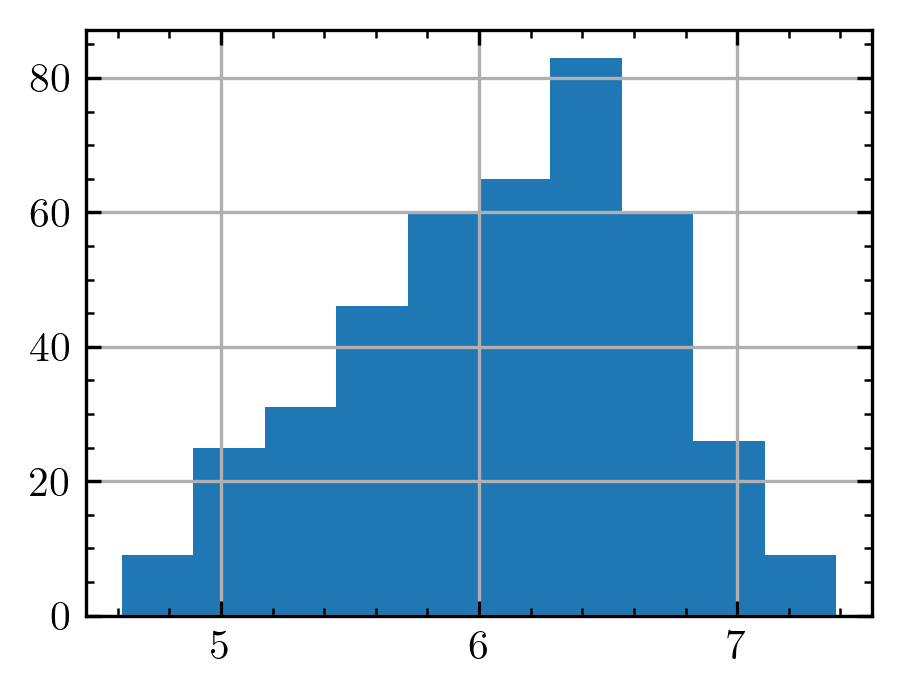

In [35]:
UCXBs['S2_mass_i'].hist()

<Axes: >

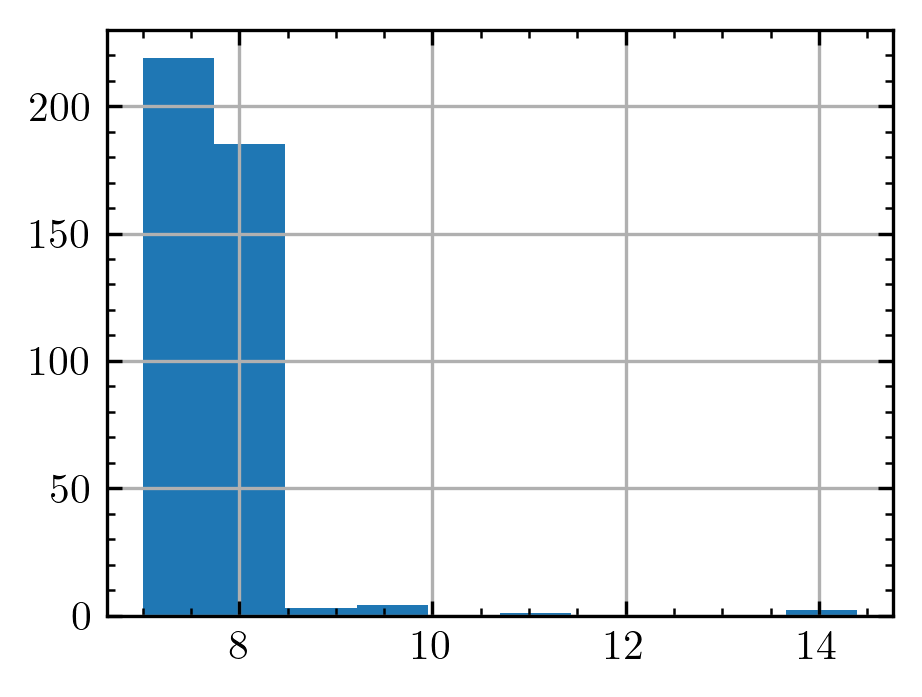

In [36]:
UCXBs['S1_mass_i'].hist()